# Absolute K Polarization Measurement

In [1]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
import one_ring.base.fitting_tools as fitt
import importlib
from one_ring.base.pint_units import ureg
import one_ring.base.h5py_tools as h5t
import scipy.constants
from scipy import constants
%matplotlib widget
import time as tm
import pyvisa as visa
import one_ring.daq.visa_instruments as nvisa
plt.style.use("dark_background")
import pandas as pd
import polarization_tools as pt
import absorption_tools as at
import one_ring.base.pandas_tools as pdt
import pickle

In [2]:
from importlib import reload
reload(at)
reload(pt)
outfname_1 = "../data/hybrid_pumping.h5"
outfname_2 = "../data/polarization_measurements.h5"

# Viewing Data

In [3]:
ih5paths = pdt.InteractiveHDF5Paths(outfname_2, n_levels=2)
ih5paths.display_widgets()

GridspecLayout(children=(Select(description='level_0', layout=Layout(grid_area='widget001'), options=('polariz…

Output()

## Wulgang Potassium Polarization 11/11/2025

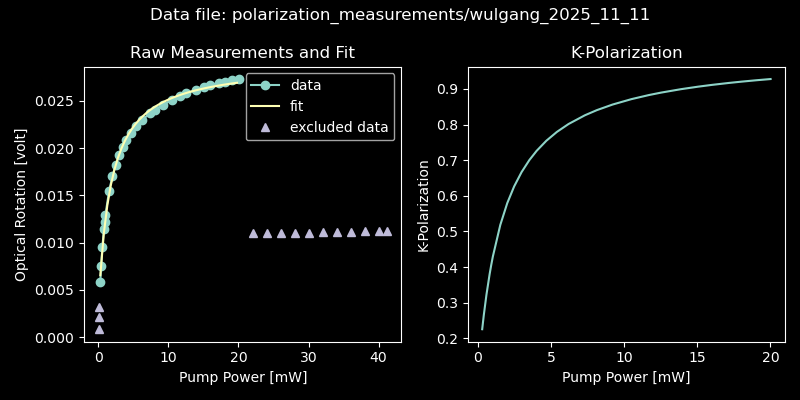

In [4]:
group_name = 'polarization_measurements/wulgang_2025_11_11'
polarization_data = pt.polarization_data(outfname_2, group_name,'pandas', (0.2,22))
fig, axes = plt.subplots(figsize=(8,4),ncols=2)
polarization_data.plot_fit(axes[0],excluded_data=True, guess=np.array([0.029,1.97,-0.55]))
polarization_data.plot_potassium_polarization(axes[1])
plt.suptitle('Data file: ' + group_name)
plt.tight_layout()
plt.show()

In [5]:
polarization_data.metadata

{'probe_laser_current': <Quantity(65, 'milliampere')>,
 'probe_power': <Quantity(0.81, 'milliwatt')>,
 'pump_laser_current': <Quantity(120, 'milliampere')>,
 'pump_temp': <Quantity(15.146, 'degree_Celsius')>,
 'probe_temp': <Quantity(16.902, 'degree_Celsius')>,
 'beam sampler ratio': 0,
 'cell_temperature': <Quantity(80, 'degree_Celsius')>,
 'By_field': <Quantity(50.277, 'microtesla')>,
 'Bx_field': <Quantity(-0.154, 'microtesla')>,
 'Bz_field': <Quantity(-0.343, 'microtesla')>,
 'Bx_field_AC_amp': <Quantity(0.0992, 'microtesla')>,
 'func_gen_amp': <Quantity(500, 'millivolt')>,
 'Bx_ac_freq': <Quantity(210, 'hertz')>,
 'mod_points': 456,
 'time_const': <Quantity(300, 'millisecond')>,
 'misc_notes': "polarization measurement at specifically 0.8 to contract yesterday's data. Note that the measurements were spliced inbetween and also towards the ends, somethign weird happened that I' not sure why",
 'last_modified': 'Tue Nov 11 13:40:31 2025'}

In [6]:
print('Probe Power = ' + str(polarization_data.metadata['probe_power']))
#using the probe power md above, and rot calibration data from 
#rotation_noise.h5, wulgang_01_11_25_analyzed_calibration_data"
#density is estimated from vapor equations and not necessarily measured
data = polarization_data.R
temp = polarization_data.probe_temp
tilt = polarization_data.field_tilt
rot_calib = (0.620 *ureg.deg/ureg.V).to(ureg.rad/ureg.V)
#density = at.potassium_density(80)
#Pz = polarization_data._polarization
#pt.estimate_cell_length(data,temp, tilt, rot_calib, density, Pz)

Probe Power = 0.81 milliwatt


## Wulgang Potassium Polarization 10/11/2025

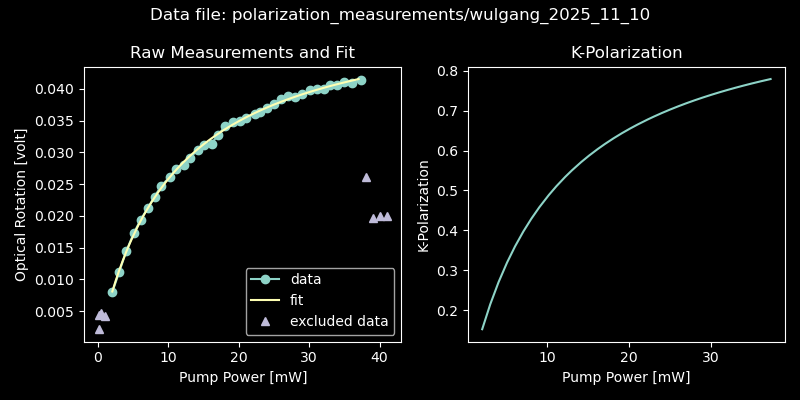

In [7]:
group_name = 'polarization_measurements/wulgang_2025_11_10'
polarization_data = pt.polarization_data(outfname_2, group_name,'pandas', (1,38))
fig, axes = plt.subplots(figsize=(8,4),ncols=2)
polarization_data.plot_fit(axes[0],excluded_data=True)
polarization_data.plot_potassium_polarization(axes[1])
plt.suptitle('Data file: ' + group_name)
plt.tight_layout()
plt.show()

In [6]:
polarization_data.metadata

{'probe_laser_current': <Quantity(65, 'milliampere')>,
 'probe_power': <Quantity(1.02, 'milliwatt')>,
 'pump_laser_current': <Quantity(120, 'milliampere')>,
 'pump_temp': <Quantity(15.146, 'degree_Celsius')>,
 'probe_temp': <Quantity(16.902, 'degree_Celsius')>,
 'beam sampler ratio': 0,
 'cell_temperature': <Quantity(80, 'degree_Celsius')>,
 'By_field': <Quantity(50.277, 'microtesla')>,
 'Bx_field': <Quantity(-0.154, 'microtesla')>,
 'Bz_field': <Quantity(-0.343, 'microtesla')>,
 'Bx_field_AC_amp': <Quantity(0.0992, 'microtesla')>,
 'func_gen_amp': <Quantity(500, 'millivolt')>,
 'Bx_ac_freq': <Quantity(210, 'hertz')>,
 'mod_points': 456,
 'time_const': <Quantity(300, 'millisecond')>,
 'misc_notes': "combined processed data for pol_1 and pol_2. Note that the measurements were spliced inbetween and also towards the ends, somethign weird happened that I' not sure why",
 'last_modified': 'Mon Nov 10 15:53:27 2025'}

In [7]:
print('Probe Power = ' + str(polarization_data.metadata['probe_power']))
#using the probe power md above, and rot calibration data from 
#rotation_noise.h5, wulgang_01_11_25_analyzed_calibration_data"
#density is estimated from vapor equations and not necessarily measured
data = polarization_data.R
temp = polarization_data.probe_temp
tilt = polarization_data.field_tilt
rot_calib = (0.620 *ureg.deg/ureg.V).to(ureg.rad/ureg.V)
density = at.potassium_density(ureg.Quantity(80,ureg.degC))
Pz = polarization_data._polarization
pt.estimate_cell_length(data,temp, tilt, rot_calib, density, Pz)

Probe Power = 1.02 milliwatt


DimensionalityError: Cannot convert from 'degree_Celsius' to 'delta_degree_Celsius'

In [ ]:
#Estimating Lx
#rot_calib = 0.010803959306180822 * ureg.rad/ureg.V
#pt.estimate_K_Lx(hp_data.R, hp_data.probe_temp.m*ureg.delta_degC, hp_data.field_tilt, rot_calib, 1.3e11, fit_result.polarization(hp_data.X.m),noMean=False)

## Wulgang Potassium Polarization 25/08/2025 ~ testing at different temperatures

I cannot do cell length estimations because the metadata does not have information about the probe power

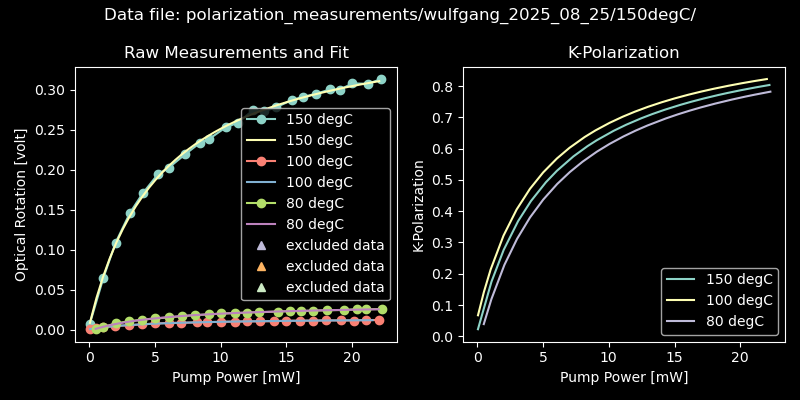

In [9]:
group_name_1 = 'polarization_measurements/wulfgang_2025_08_25/150degC/'
group_name_2 = 'polarization_measurements/wulfgang_2025_08_25/100degC/'
group_name_3 = 'polarization_measurements/wulfgang_2025_08_26/80degC/'
polarization_data_1 = pt.polarization_data(outfname_1, group_name_1,'numpy', (0.0,40))
polarization_data_2 = pt.polarization_data(outfname_1, group_name_2,'numpy', (0.0,40))
polarization_data_3 = pt.polarization_data(outfname_1, group_name_3,'numpy', (0.0,40))
guess = np.array([0.029,1.97,-0.55])

fig, axes = plt.subplots(figsize=(8,4),ncols=2)
polarization_data_1.plot_fit(axes[0],excluded_data=True, dlabel='150 degC', flabel='150 degC', guess=guess)
polarization_data_2.plot_fit(axes[0],excluded_data=True, dlabel='100 degC', flabel='100 degC', guess=guess)
polarization_data_3.plot_fit(axes[0],excluded_data=True, dlabel='80 degC', flabel='80 degC', guess=guess)
polarization_data_1.plot_potassium_polarization(axes[1],label='150 degC')
polarization_data_2.plot_potassium_polarization(axes[1],label='100 degC')
polarization_data_3.plot_potassium_polarization(axes[1],label='80 degC')

plt.suptitle('Data file: ' + group_name_1)
plt.tight_layout()
plt.show()

## Olaf Potassium Polarization 09/09/2025
this data set was good but I am forgetting about it because one, I can't trust its data we think the measurement for the length of the cell is bad. Will have to comeback to olaf another time. I will be deleting the code necessary for processing this data but incase if you need it, look at the metadata to find the skip_points or mod_points key. This tells you which how many datapoints you need to skip in the series in order to get independent datapoints (within 10 time constants independent)

I will delete all the plots for even more older polarization plots for olaf as I will be focusing on getting the procedure correct for Wulgang before moving on to olaf and other cells